In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "../src/data/"
a507 = pd.read_csv(path + 'A507.csv')
a501 = pd.read_csv(path + 'A501.csv')
a502 = pd.read_csv(path + 'A502.csv')
hall = pd.read_csv(path + 'Hall.csv')

In [3]:
def boxplot(csv):
    ap = list(csv.ap_id.unique())
    rssi = [csv.loc[csv.ap_id == i].rssi for i in ap]
    plt.figure(figsize=(14,8))
    plt.boxplot(rssi);
    plt.xticks(range(1,len(ap)+1),ap, rotation=60);
    plt.title(str(csv.room_id[0]))
    plt.show();

In [4]:
def histograms(csv1, csv2):
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    ax[0].hist(csv1.rssi)
    ax[0].set_title(str(csv1.room_id[0]))
    ax[1].hist(csv2.rssi)
    ax[1].set_title(str(csv2.room_id[0]))
    ax[0].grid()
    ax[1].grid()
    plt.tight_layout()
    plt.show();

In [15]:
def grouped_histogram(csv1, csv2, csv3, csv4):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
    ax1.hist(csv1.rssi, color= 'blue', alpha=0.7, label=str(csv1.room_id[0]))
    ax1.hist(csv2.rssi, color= 'red', alpha=0.7, label=str(csv2.room_id[0]))
    ax1.set_title(f'{str(csv1.room_id[0])} and {str(csv2.room_id[0])}')
    ax1.grid()
    ax1.legend(loc='best')
    ax2.hist(csv3.rssi, color= 'blue', alpha=0.7, label=str(csv3.room_id[0]))
    ax2.hist(csv4.rssi, color= 'red', alpha=0.7, label=str(csv4.room_id[0]))
    ax2.set_title(f'{str(csv3.room_id[0])} and {str(csv4.room_id[0])}')
    ax2.grid()
    ax2.legend(loc='best')
    plt.tight_layout()
    plt.show();

In [6]:
for csv in [a507, a501, a502, hall]:
    print(f'{str(csv.room_id[0])} - There is {len(csv.ap_id.unique())} Access points.')

A507 - There is 17 Access points.
A501 - There is 25 Access points.
A502 - There is 19 Access points.
Hodnik - There is 15 Access points.


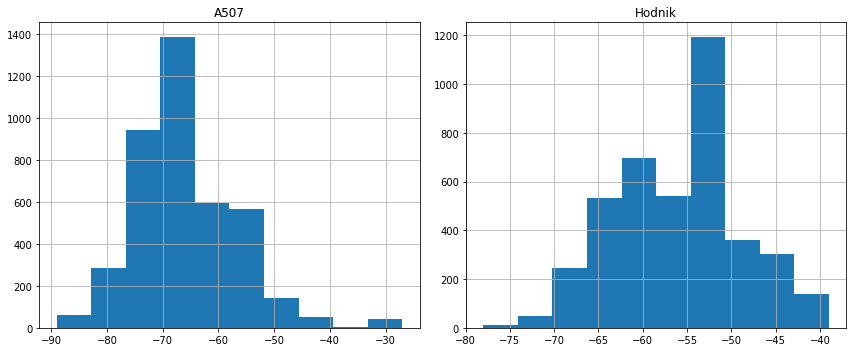

In [33]:
histograms(a507,hall)

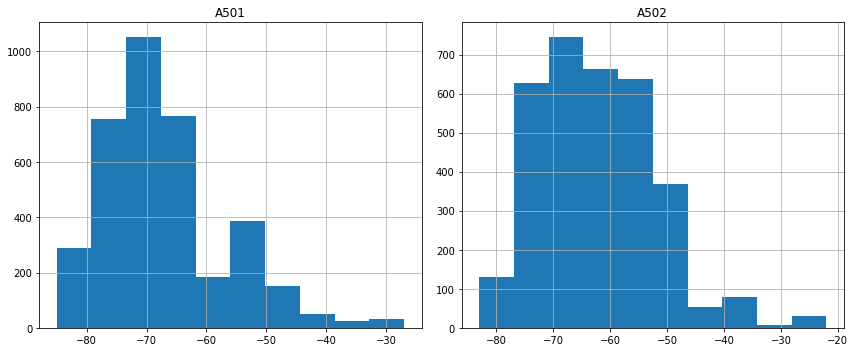

In [7]:
histograms(a501, a502)

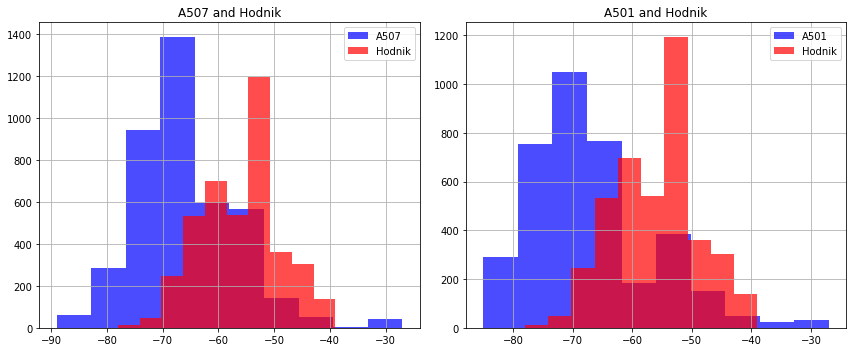

In [16]:
grouped_histogram(a507, hall, a501, hall)

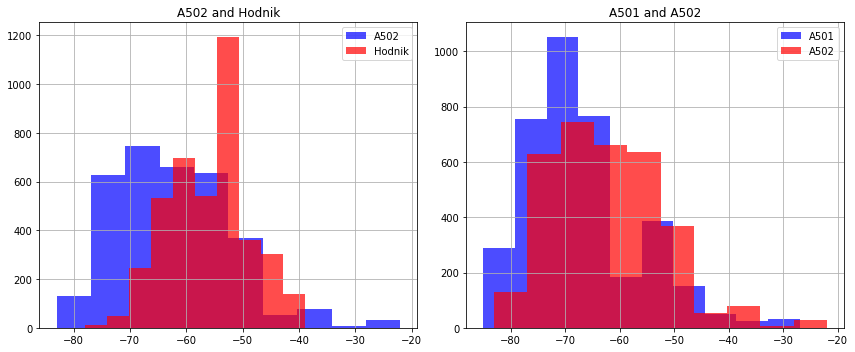

In [18]:
grouped_histogram(a502, hall, a501, a502)

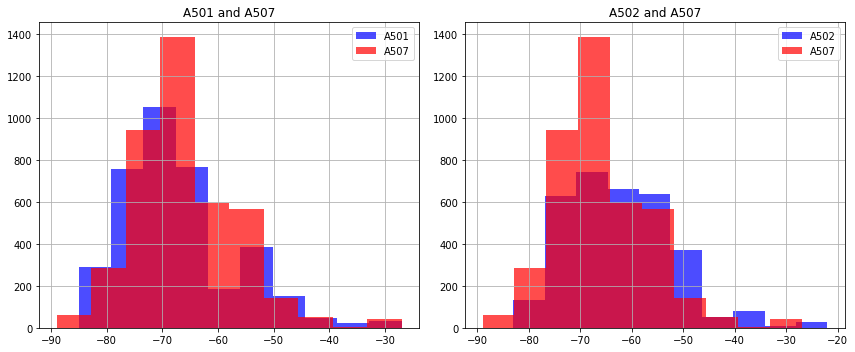

In [19]:
grouped_histogram(a501, a507, a502, a507)

In [38]:
a507.loc[a507.rssi > -40].ap_id.unique()

array(['KTOS', 'DIRECT-A8-HP OfficeJet Pro 8730'], dtype=object)

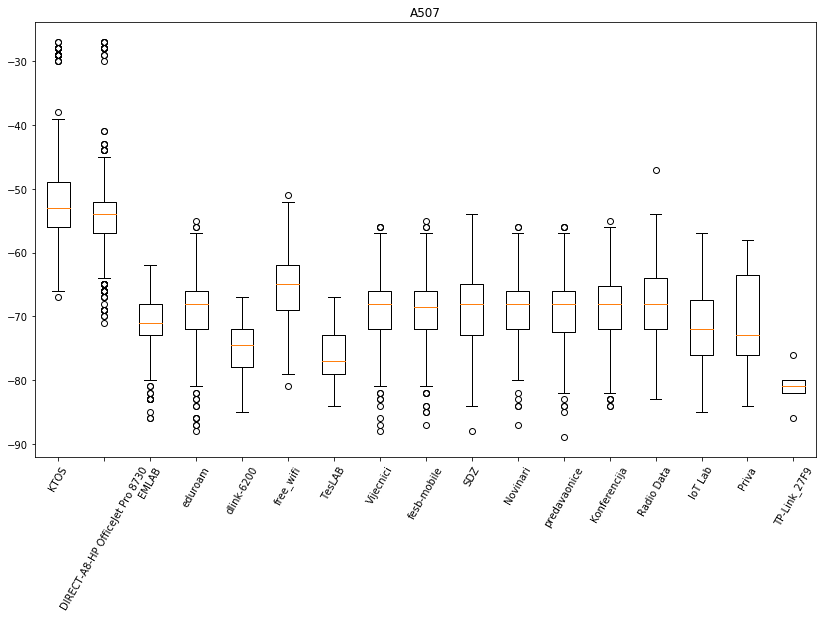

In [36]:
boxplot(a507)

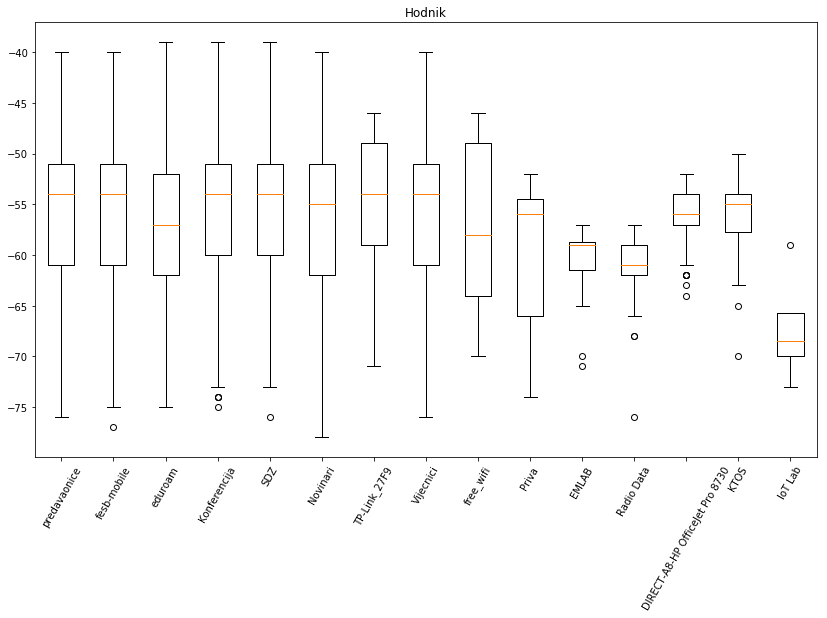

In [37]:
boxplot(hall)

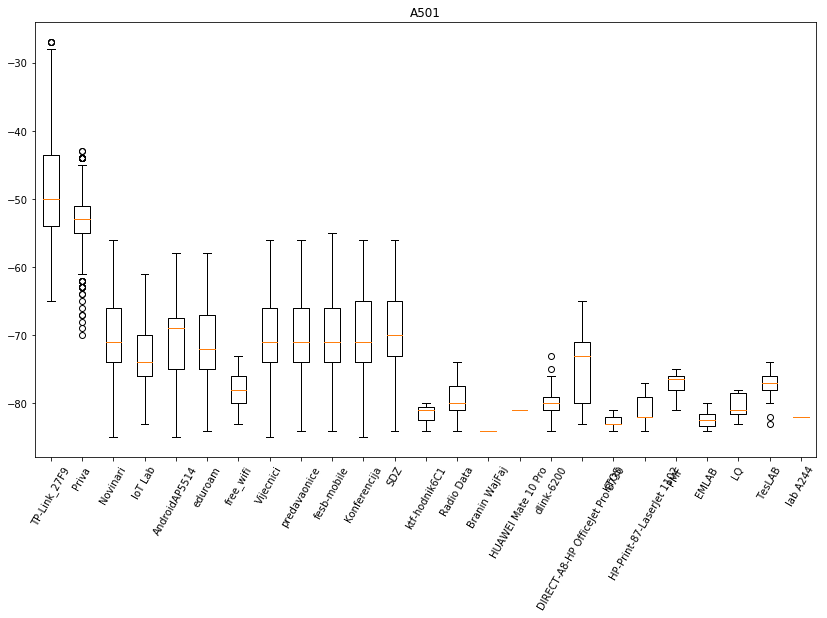

In [11]:
boxplot(a501)

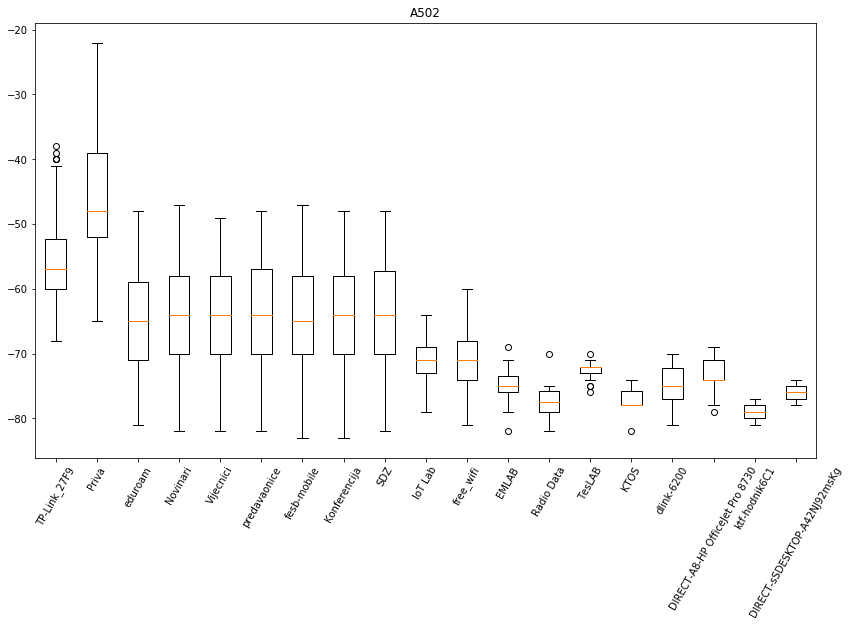

In [12]:
boxplot(a502)